# Semisupervised Learning

Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning. Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person,4 and it is able to name everyone in every photo, which is useful for searching photos.

### Scikit-Learn Cheatsheet

<img src="images/cheatsheet.jpg" width="800" height="1000"/>

In online documentation, you can actually click on the estimator in image for further information. 

Be careful about preparing the data before you feed it to estimators. The input data for sklearn is 2D(m,n) where m is the number of samples and n is the number of features. Following example illustrate this problem:

In [1]:
%xmode Plain
import numpy as np
from sklearn.linear_model import LogisticRegression

x = np.array([1,2,3])
y = np.array([1,2,3])

model = LogisticRegression()
try:
    model.fit(x,y)
except ValueError as e:
    print(e)

Exception reporting mode: Plain
Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


Following is the correct way - 

In [2]:
X = x[:, np.newaxis] #this turn 1D array in 2D (3,1) array
model.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Scikit-Learn API Summary
<img src="images/api.png" width="700" height="1000"/>

<img src="images/est.png" width="400" height="600"/>

 - All supervised models have a **`score(X_test, y_test)`** method, that allows an evaluation of the model.
 - For clustering algorithms, the **`labels_`** attribute stores the cluster membership for the training data.
 - For manifold learning algorithms, the **`embedding_`** attribute stores the embedding (transformation) of the training data in the lower-dimensional space.
 - For linear models, the **`coef_`** attribute stores the weight or coefficient vector.
 - For linear decomposition and dimensionality reduction methods, **`components_`** stores the array of components


#### Inherently Multiclass

    – sklearn.naive_bayes.BernoulliNB
    – sklearn.tree.DecisionTreeClassifier
    – sklearn.tree.ExtraTreeClassifier
    – sklearn.ensemble.ExtraTreesClassifier
    – sklearn.naive_bayes.GaussianNB
    – sklearn.neighbors.KNeighborsClassifier
    – sklearn.semi_supervised.LabelPropagation
    – sklearn.semi_supervised.LabelSpreading
    – sklearn.discriminant_analysis.LinearDiscriminantAnalysis
    – sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)
    – sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
    – sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)
    – sklearn.neural_network.MLPClassifier
    – sklearn.neighbors.NearestCentroid
    – sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
    – sklearn.neighbors.RadiusNeighborsClassifier
    – sklearn.ensemble.RandomForestClassifier
    – sklearn.linear_model.RidgeClassifier
    – sklearn.linear_model.RidgeClassifierCV

#### Multiclass as One-Vs-One:
    – sklearn.svm.NuSVC
    – sklearn.svm.SVC.
    – sklearn.gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_one”)
    
#### Multiclass as One-Vs-All:

    – sklearn.ensemble.GradientBoostingClassifier
    – sklearn.gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_rest”)  
    – sklearn.svm.LinearSVC (setting multi_class=”ovr”)
    – sklearn.linear_model.LogisticRegression (setting multi_class=”ovr”)
    – sklearn.linear_model.LogisticRegressionCV (setting multi_class=”ovr”)
    – sklearn.linear_model.SGDClassifier
    – sklearn.linear_model.Perceptron
    – sklearn.linear_model.PassiveAggressiveClassifier

#### Support multilabel:

    – sklearn.tree.DecisionTreeClassifier
    – sklearn.tree.ExtraTreeClassifier
    – sklearn.ensemble.ExtraTreesClassifier
    – sklearn.neighbors.KNeighborsClassifier
    – sklearn.neural_network.MLPClassifier
    – sklearn.neighbors.RadiusNeighborsClassifier
    – sklearn.ensemble.RandomForestClassifier
    – sklearn.linear_model.RidgeClassifierCV

#### Support multiclass-multioutput:

    – sklearn.tree.DecisionTreeClassifier
    – sklearn.tree.ExtraTreeClassifier
    – sklearn.ensemble.ExtraTreesClassifier
    – sklearn.neighbors.KNeighborsClassifier
    – sklearn.neighbors.RadiusNeighborsClassifier
    – sklearn.ensemble.RandomForestClassifier

### Metrics

from `sklearn.metrics`

In [3]:
from sklearn.metrics import accuracy_score         #accuracy classfication score
from sklearn.metrics import auc                    #compute AUC using trapezoidal rule
from sklearn.metrics import classification_report  #build a text report showing main classification metrics
from sklearn.metrics import confusion_matrix       #compute confusion matrix to evaluate accuracy of classification
from sklearn.metrics import f1_score               #compute f1 score
from sklearn.metrics import precision_recall_curve #compute precision-recall pairs for different probability threshold
from sklearn.metrics import precision_score        #compute the precison
from sklearn.metrics import recall_score           #compute the recall`
from sklearn.metrics import roc_auc_score          #compute AUC for ROC from prediction scores
from sklearn.metrics import roc_curve              #compute ROC

In [4]:
>>> y_true = [0, 1, 2, 2, 2]
>>> y_pred = [0, 0, 2, 2, 1]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



### Model Selection

Classes and functions from **`sklearn.model_selection`**

In [5]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import train_test_split  #function for spliting data sets
from sklearn.model_selection import GridSearchCV      #hyper-parameters optimization
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


### Data Generator Utilities - helper functions

In [6]:
from sklearn.datasets import make_blobs #n_samples=100, n_features=2, centers=3; key parameters with default values
from sklearn.datasets import make_circles #n_samples=100
from sklearn.datasets import make_classification #n_samples=100,n_features=20,n_informative=2,n_redundant=2,n_repeated=0,n_classes=2,n_clusters_per_class=2
from sklearn.datasets import make_moons #n_samples=100
from sklearn.datasets import make_regression #n_samples=100, n_features=100, n_informative=10, n_targets=1
from sklearn.datasets import make_s_curve #n_samples=100

### Datasets

In [7]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.datasets import load_sample_image   # 2 images, 'china.jpg' and 'flower.jpg' are available
from sklearn.datasets import load_sample_images  #loads both images (china.jpg and flower.jpg) simulataneusly 
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_mldata        #MNIST original datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_olivetti_faces


In [8]:
image = load_sample_images()
image.filenames


['C:\\Users\\mcc\\Miniconda3\\lib\\site-packages\\sklearn\\datasets\\images\\china.jpg',
 'C:\\Users\\mcc\\Miniconda3\\lib\\site-packages\\sklearn\\datasets\\images\\flower.jpg']

In [9]:
calhouse = fetch_california_housing()

In [10]:
calhouse.data.shape

(20640, 8)

### Preprocessing Module

In [11]:
from sklearn.preprocessing import Imputer              #Imputation transformer for completing missing data
from sklearn.preprocessing import LabelEncoder         #Encode labels with values between 0 and n_classes-1
from sklearn.preprocessing import MinMaxScaler         #transform features by scaling each features to a given range
from sklearn.preprocessing import Normalizer           #Normalize samples individually to unit norm
from sklearn.preprocessing import OneHotEncoder        #encode categorical integer features using one-hot aka one-of-K feature
from sklearn.preprocessing import PolynomialFeatures   #generate polynomial and interaction features
from sklearn.preprocessing import StandardScaler       #standardize features by removing mean and scaling to unit variance
from sklearn.preprocessing import label_binarize       #multi class labels to binary labels


### Preprocessing: Handling Missing Data



In [12]:

import numpy as np
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])


from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### Preprocessing: Transforming 1-D array into Higher Dimensional Array

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
a = poly.fit_transform(x[:, None])
a

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [14]:
# Now you can use this for polynomial regression
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

### Handling Categorical Data

In [15]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


As we can see in the preceding output, the newly created DataFrame contains a nominal feature (color), an ordinal feature (size), and a numerical feature (price) column. The class labels (assuming that we created a dataset for a supervised learning task) are stored in the last column.

#### Mapping Ordinal Features

Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In [16]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
inv_size_mapping ={k:v for v,k in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [18]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [19]:

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

To encode this, you might think of trying this:

In [20]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

But this approach doesn't always work. 

In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn's DictVectorizer will do this for you:

In [21]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [23]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [22]:

vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:

In [24]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [25]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if you don’t want 0–1 for some reason. Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called `StandardScaler` for standardization.

Following is from Sebastian's book - 

The importance of feature scaling can be illustrated by a simple example. Let us assume we have 2 features where one feature is measured on a scale of 1 to 10 while other is measured on the scale of 1 to 10,000. When we think of the squared error function in Adaline, it is intuitive to say that the algorithm would mostly be busy with optimizing the weights accroding to the larger errors in feature 2. Another example is KNN with a Euclidean distance measure; the computed distances between samples will be dominated by second feature axis.

Now there are two common approaches to bringing different features onto the same scale: normalization and standardization. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. Most often,
normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize our data, we can simply apply the min-max scaling to each feature column, where the new value (i) norm x of a sample x(i)
can be calculated as follows:

$x_{(norm)}^{i} =  \frac{x^i-x_{min}}{x_{max}-x_{min}}$

Here, x(i) is a particular sample, min x is the smallest value in a feature column,
and max x the largest value, respectively.

The procedure for standardization can be expressed as follows: -

$x_{std}^{i} =  \frac{(x^{i}-\mu_x)}{(\sigma_{x})}$

### Validation Curve

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

In [27]:

from sklearn.model_selection import validation_curve

'''
Signature: validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)

Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the results.
'''

"\nSignature: validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)\n\nDocstring:\nValidation curve.\n\nDetermine training and test scores for varying parameter values.\n\nCompute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this\nwill also compute training scores and is merely a utility for plotting the results.\n"

In [28]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [29]:
X[:4], y[:4]

(array([[1.73907352e-01],
        [5.18867376e-01],
        [1.30815988e-08],
        [9.14049845e-02]]),
 array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623]))

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7) # 7 fold cross validation

In [31]:
train_score.shape, val_score.shape

((21, 7), (21, 7))

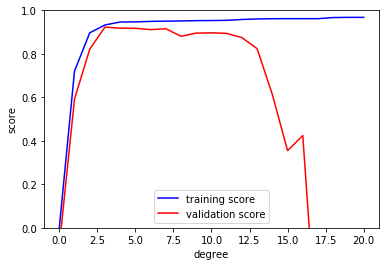

In [32]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible.

### Cross Validation Score

From doc(section 3.3) - 

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model
that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test,
y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial
settings machine learning usually starts out experimentally.

In scikit-learn a random split into training and test sets can be quickly computed with the `train_test_split`
helper function.

When evaluating different settings (“hyperparameters”) for estimators, such as the `C` setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a socalled “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.
However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be
used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles).

The following procedure is followed for each of the k “folds”:
 - A model is trained using 𝑘 − 1 of the folds as training data;
 - the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an
arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is
very small.

In [33]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(iris.data, iris.target)

clf = SVC(kernel = 'linear', C = 1,)
clf.fit(Xtrain, Ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
clf.score(Xtrain, Ytrain)

0.9910714285714286

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

iris = load_iris()
clf = SVC(kernel = 'linear', C = 1,)
scores = cross_val_score(clf, iris.data, iris.target, cv = 5)
scores  #test scores for validation sets

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [36]:
scores.mean()

0.9800000000000001

By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change
this by using the `scoring` parameter:

In [37]:
#from sklearn import metrics  -> seems this import is not needed for scoring = 'f1_macro'
scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

Below is the details of scoring methods. (Refer page 473 of scikit 19 docs)

![](images/scoring.png)

#### `cross_validate` function

The `cross_validate` function differs from `cross_val_score` in two ways 

- It allows specifying multiple metrics for evaluation.
- It returns a dict containing training scores, fit-times and score-times in addition to the test score.

For single metric evaluation, where the scoring parameter is a string, callable or None, the keys will be -
`['test_score', 'fit_time', 'score_time']`
And for multiple metric evaluation, the return value is a dict with the following keys -
`['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']`
`return_train_score` is set to `True` by default. It adds train score keys for all the scorers. If train scores are not
needed, this should be set to `False` explicitly.

In [38]:

from sklearn.model_selection import cross_validate
#from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=5, return_train_score=True)
scores

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0.        , 0.0156002 , 0.        , 0.        , 0.01559997]),
 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]),
 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]),
 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}

### Learning Curve

Determines cross-validated training and test scores for different training set sizes.

In [39]:
#from sklearn.learning_curve import learning_curve - deprecated 
from sklearn.model_selection import learning_curve

'''
Signature: learning_curve(estimator, X, y, groups=None, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]),/
cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1,/
pre_dispatch='all', verbose=0, shuffle=False, random_state=None)

Docstring:
Learning curve.

Determines cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with 
varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. 
Afterwards, the scores will be averaged over all k runs for each training subset size.
'''

"\nSignature: learning_curve(estimator, X, y, groups=None, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]),/\ncv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1,/\npre_dispatch='all', verbose=0, shuffle=False, random_state=None)\n\nDocstring:\nLearning curve.\n\nDetermines cross-validated training and test scores for different training set sizes.\n\nA cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with \nvarying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. \nAfterwards, the scores will be averaged over all k runs for each training subset size.\n"

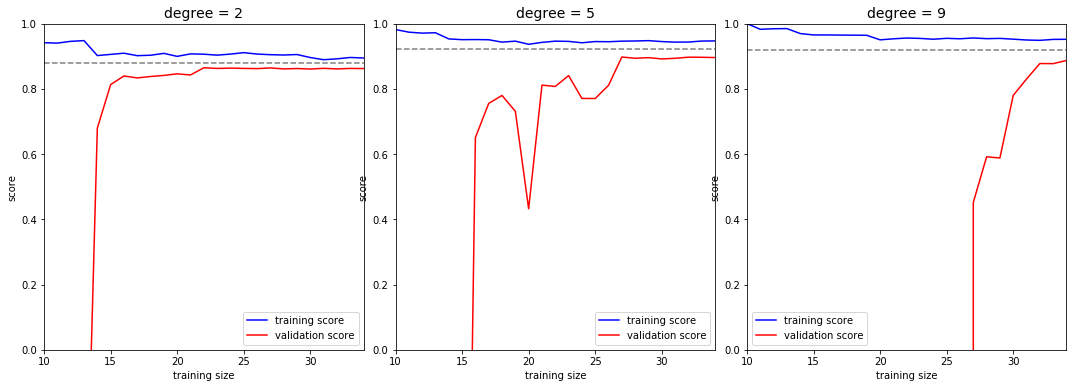

In [40]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,5,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

### Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X,y)
grid.best_params_

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In above example, we are actually using 2 classifiers (PolynomialFeatures and LinearRegression) and each classifier has its own set of knobs to tune. See how `param_grid` has been defined. the keys of `param_grid` dictionary are comprised of 2 parts. First part is the name of classifier and second is the name of hyperparameter (knob). For example, `linearregression__fit_intercept` implies that we are varying `fit_intercept` hyperparameter of `LiponearRegression` classifier. Notice that names of classifier and hyperparameter are seperated with 2 underscore.

Refer [ML-Support Vector Machines](ML - Support Vector Machines.ipynb) for another example of GridSearchCV

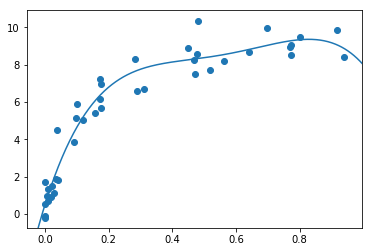

In [42]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Curse of Dimensionality

The common theme of dimensionality related problems is that when the dimensionality increases, the volume of the space increases so fast  that the available data become sparse. This sparsity is problemetic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. 

If there is only one feature, then it may be possible that only 10 observations are needed. But as the numbers of features grow (i.e. dimensionality increases), the same amount of data become more and more sparse and the need for data grows exponentially. (from Wikipedia)

For an estimator to be effective, you need the distance between neighboring points to be less than some value 𝑑, which depends on the problem. In one dimension, this requires on average 𝑛 ∼ 1/𝑑 points. In the context of the above 𝑘-NN example, if the data is described by just one feature with values ranging from 0 to 1 and with 𝑛 training observations, then new data will be no further away than 1/𝑛. Therefore, the nearest neighbor decision rule will be efficient as soon as 1/𝑛 is small compared to the scale of between-class feature variations. If the number of features is 𝑝, you now require 𝑛 ∼ 1/𝑑𝑝 points. Let’s say that we require 10 points in one dimension: now 10𝑝 points are required in 𝑝 dimensions to pave the [0, 1] space. As 𝑝 becomes large, the number of training points required for a good estimator grows exponentially. For example, if each point is just a single number (8 bytes), then an effective 𝑘-NN estimator in a paltry 𝑝 ∼ 20 dimensions would require more training data than the current estimated size of the entire internet (}1000 Exabytes or so). This is called the curse of dimensionality and is a core problem that machine learning addresses. (from Documentation)


[3.74540119 9.50714306 7.31993942 5.98658484]
[ 7.22926896 18.18565441 13.52423055 10.67206599]


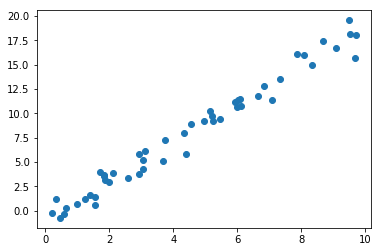

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
print(x[:4])
print(y[:4])

In [44]:
m = -1
b= 0
sum = 0
for X,Y in zip(x,y):
    a = (Y -((m*X)+b))**2
    sum = sum + a
print(sum/50)


226.47171728343943


In [45]:
import numpy as np
XX,YY = np.meshgrid(x,y)


### Plotting of Error Curve



In [46]:
import numpy as np
m = np.linspace(0,1,50)  #values for slope
b = np.linspace(-2,3,50) #values for intercept

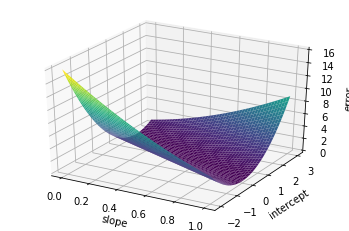

In [47]:
M,B= np.meshgrid(m,b)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

a =(2 -((M*2)+B))**2  #value of x and y have been set to 2. 'a' is a error function

ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('error')
ax.plot_surface(M, B, a,  rstride=1, cstride=1, cmap='viridis')

## Comparison of Various Classification with Different Datasets

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


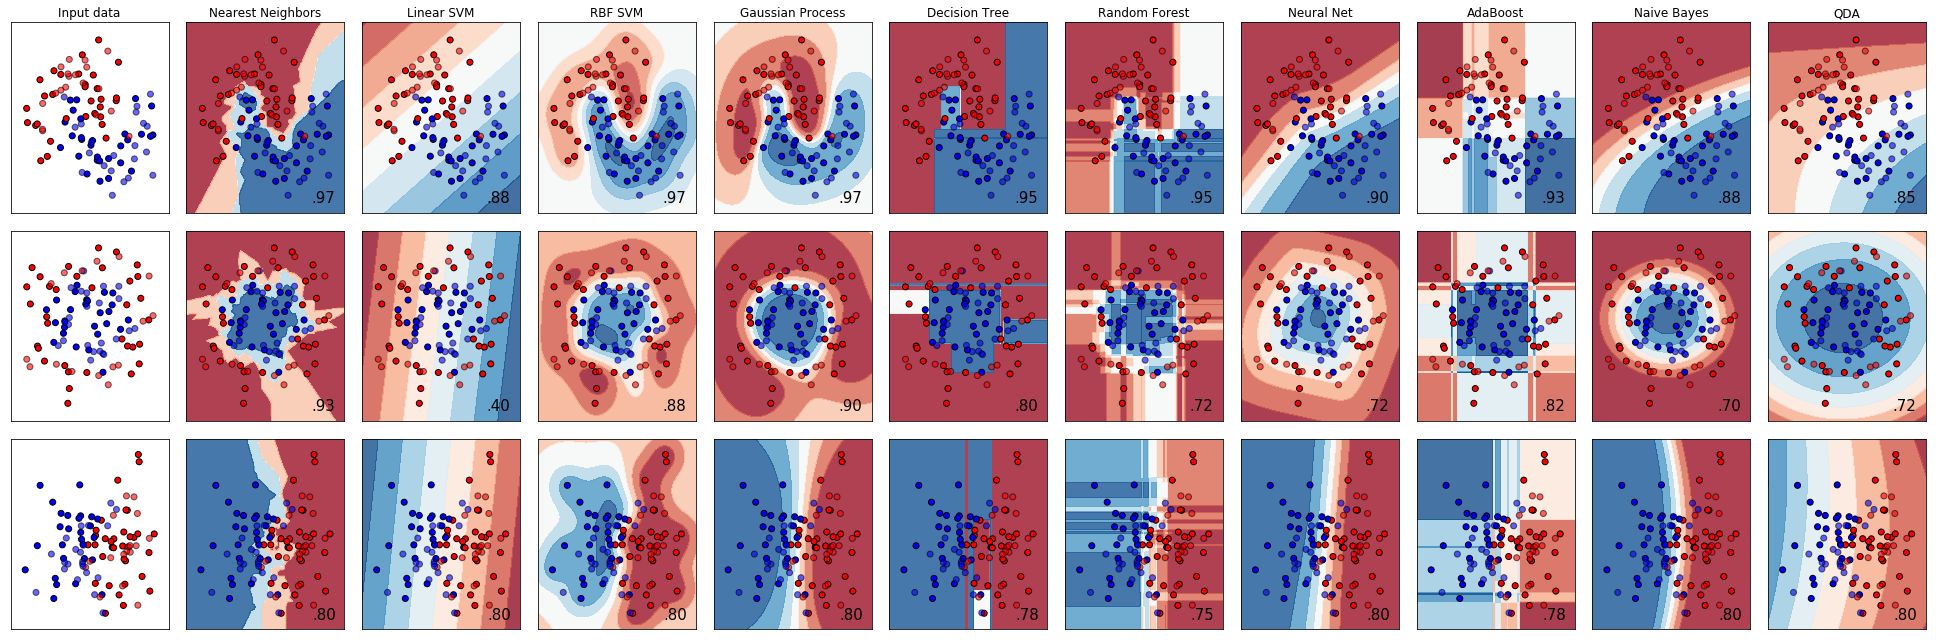

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 # step size in the mesh
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
"Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
"Naive Bayes", "QDA"]

classifiers = [
KNeighborsClassifier(3),
SVC(kernel="linear", C=0.025),
SVC(gamma=2, C=1),
GaussianProcessClassifier(1.0 * RBF(1.0)),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
MLPClassifier(alpha=1),
AdaBoostClassifier(),
GaussianNB(),
QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
# just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
# Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
# iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()

#### Drawing Decision Boundry

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


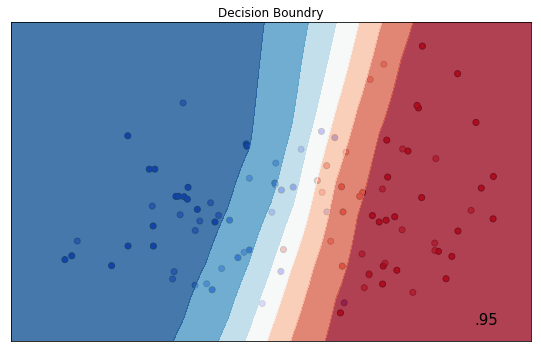

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification,make_moons

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

clf = MLPClassifier(alpha = 1)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),np.arange(y_min, y_max, .2))

figure = plt.figure(figsize=(15, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Decision Boundry")
#plotting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
#plotting test points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
#fit the model and calculate the model's probability prediction
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8);
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')    
plt.tight_layout()

### Stochastic Gradient Descent Classifier

In [50]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Linear classifiers (SVM, logistic regression, etc) with SGD training.  The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the `partial_fit` method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

Parameters 
`loss` : str, default: `hinge`
The loss function to be used. Defaults to `hinge`, which gives a linear SVM. The possible options are `hinge`, `log`, `modified_huber`, `squared_hinge`, `perceptron`, or a regression loss: `squared_loss`, `huber`, `epsilon_insensitive`, or
`squared_epsilon_insensitive`.

The `log` loss gives logistic regression, a probabilistic classifier. `modified_huber` is another smooth loss that brings tolerance to outliers as well as probability estimates. `squared_hinge` is like hinge but is quadratically penalized. `perceptron` is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.

`penalty` : str, `none`, `l2`, `l1`, or `elasticnet`
The penalty (aka regularization term) to be used. Defaults to `l2` which is the standard regularizer for linear SVM models. `l1` and `elasticnet` might bring sparsity to the model (feature selection) not achievable with `l2`.

`alpha` : float
Constant that multiplies the regularization term. Defaults to 0.0001 Also used to compute learning_rate when set to `optimal`.

In [51]:
%run GradientDescent/gd.py

ERROR:root:File `'GradientDescent/gd.py'` not found.


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Decision Functions for Classifiers

|classifier|decision function|
|----------|------------------|
|MLPClassifier| predict_proba()|
|KNeighborsClassifier| predict_proba()|
|SVC|decision_function()|
|DicisionTreeClassfier|predict_proba()|
|RandomForestClassifier|predict_proba()|
|GaussianNB|predict_proba()|
|LogisticRegression| predict_proba() and decision_function()|

**Note** - In logistic regression, `decision_function()` gives the signed distance from decision boundary

#### Feature Selection

In [53]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

iris = load_iris()
X,y = iris.data, iris.target

var = VarianceThreshold(.20)
X1 = var.fit_transform(X)
X1.shape, X1[:2]

((150, 3), array([[5.1, 1.4, 0.2],
        [4.9, 1.4, 0.2]]))

In [54]:
np.var(X[:,0]),np.var(X[:,1]),np.var(X[:,2]),np.var(X[:,3]) #second column with var = .1867 was removed

(0.6811222222222223,
 0.1887128888888889,
 3.0955026666666665,
 0.5771328888888888)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(chi2, k = 2)
X2 = model.fit_transform(X,y)
X2[:2]

array([[1.4, 0.2],
       [1.4, 0.2]])

In [56]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [57]:

from scipy import stats
stats.chisquare(X[:,0]),stats.chisquare(X[:,1]),stats.chisquare(X[:,2]),stats.chisquare(X[:,3])

(Power_divergenceResult(statistic=17.48459783228751, pvalue=1.0),
 Power_divergenceResult(statistic=9.258700392498909, pvalue=1.0),
 Power_divergenceResult(statistic=123.55651942522616, pvalue=0.9367540505723184),
 Power_divergenceResult(statistic=72.18171206225679, pvalue=0.9999999850866128))

The columns with low `statistic` were removed.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds
out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

#### Feature Extraction

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'this is the first document',
    'this is the second second document',
    'this is the third document',
    'is this the first document?'
]

count = CountVectorizer()
X = count.fit_transform(corpus)

In [59]:
count

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

The default configuration tokenizes the string by extracting words of at least 2 letters. The specific function that does this step can be requested explicitly:

In [60]:
analyze = count.build_analyzer()
analyze('I am 1 mile away from you') == (['am', 'mile','away','from','you'])

True

In [61]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=count.get_feature_names())

,document,first,is,second,the,third,this
0,1,1,1,0,1,0,1
1,1,0,1,2,1,0,1
2,1,0,1,0,1,1,1
3,1,1,1,0,1,0,1


Each term found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix. This interpretation of the columns can be retrieved as follows:

In [62]:
count.get_feature_names()

['document', 'first', 'is', 'second', 'the', 'third', 'this']

In [63]:
import numpy as np
X.toarray()


array([[1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 2, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1]], dtype=int64)

Note that the first document and third document in corpus have exactly the same words with same counts. In particular we lose the information that the last document is an interrogative form. To preserve some of the local ordering information we can extract 2-grams of words in addition to the 1-grams (individual words):

In [64]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])


True

#### TF-IDF

TF stands for Term Frequency and IDF stands for Inverse Document Frequency. The weight TF-IDF is essentially the product of two separate statistical measures TF and IDF. This weight is a statistical measure used to evaluate how important a word is to a document in a corpus.

TF commputes the normalized term frequency, that is, the number of times a word occur in a document divided by the total word count (all words) of that document. IDF is computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little
meaningful information about the actual contents of the document. If we were to feed the direct count data directly to
a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common
to use the tf–idf transform.

Consider a document containing 100 words wherein the word *cat* appears 3 times. TF value for 'cat' would be 3/100 = .03. However Scikit doesn't use this definition of TF. In Scikit, TF is simply the count and count isn't divided by number of docs (see below).
Now, assume we have 10 million documents and the word 'cat' appears in one thousand of these. Then IDF is calculated as log(10000000/1000) = 4. Thus TF-IDF weight is the product of these quantities: .03\*4 = 0.12 (Again, idf is calculated differently in Scikit.)

Example of using `sklearn.feature_extraction.text.TfidfVectorizer` can be found in [ML - Naive Bayes](ML - Naive Bayes.ipynb#Multinomial-NB)

In [65]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(smooth_idf = False)

X = tfidf.fit_transform(counts)
X.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In Scikit, tf-idf is calculated as follows (with parameter `smooth_idf` set to `False`, different formula is used in case of `True`) - 

For first term in first document, the count is 3 so `tf` would be 3. The term `idf` is calculated using following formula -

$$idf(t) = log\frac{n_d}{df(d,t)}+1$$

Here $n_d$ is the total number of documents and $df(d,t)$ is the number of documend ts where term $t$ is present.
The resulting tf-idf vector is then normalized by Euclidean norm - 

$$v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_1^2+v_2^2....+v_n^2}}$$

$n_d$ for this term would be 6 and since this term is present in all 6 documents, $df(d,t)$ would also be 6. This gives -

idf for term1 in first doc = log(6/6)+1 = log1 +1 = 0 + 1 = 1

Similarily, idf for second and third terms are = 0, 2.0986

So our `tf-idf` vector for first document is  - `[3,0,2.0986]`

Let's apply Euclidean norm on this vector - 

In [66]:
tf = [3,0,2.0986]
tf_norm = []
for i in tf:
    a = i/(np.sqrt(np.sum(np.array(tf)**2)))
    tf_norm.append(a)
    
tf_norm    

[0.8194115275907136, 0.0, 0.5732056772672904]

This is exactly the same as first row of X.

In case of `smooth_idf` set to `True` (default value), the formula for calculating idf is as below - 
$$idf(t) = log\frac{1+ n_d}{1+ df(d,t)}+1$$



##### `TfidVectorizer`

This takes corpus as input. Above `TfidfTransformer` took count as input. 


As tf–idf is very often used for text features, there is also another class called `TfidfVectorizer` that combines all the options of `CountVectorizer` and `TfidfTransformer` in a single model:

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [68]:
corpus = [
    'this is the first document',
    'this is the second second document',
    'this is the third document',
    'is this the first document?'
]

In [69]:

tfidf_vect = vect.fit_transform(corpus)
tfidf_vect.toarray()

array([[0.39896105, 0.60276058, 0.39896105, 0.        , 0.39896105,
        0.        , 0.39896105],
       [0.23131867, 0.        , 0.23131867, 0.88654763, 0.23131867,
        0.        , 0.23131867],
       [0.361028  , 0.        , 0.361028  , 0.        , 0.361028  ,
        0.69183461, 0.361028  ],
       [0.39896105, 0.60276058, 0.39896105, 0.        , 0.39896105,
        0.        , 0.39896105]])

In [70]:
vect.vocabulary_

{'this': 6,
 'is': 2,
 'the': 4,
 'first': 1,
 'document': 0,
 'second': 3,
 'third': 5}

In [71]:
vect.get_feature_names()

['document', 'first', 'is', 'second', 'the', 'third', 'this']

In [72]:

vect.get_params

<bound method BaseEstimator.get_params of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>